# Line Drawing Algorithm
* Digital differential analyzer
* Bresenham's algorithm
* Mid Point Analyzer

## 1. Digital Differential 

### 1.1. Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1.2. Variables initialization

In [22]:
points = np.array([[0, 0], [4, 6]])

### 1.3. Algorithm
* Step 1: Find slope
* Step 2: del_x and del_y
* Step 3: |del_x| >= |del_y| and |del_x| < |del_y|
* Step 4: Plot line

#### 1.3.1 Finding slope

In [30]:
del_x = points[1][0] - points[0][0]
del_y = points[1][1] - points[0][1]
m = del_y / del_x
m

1.5

#### 1.3.2. ReCalculate del_x, del_y

In [31]:
if abs(del_x) >= abs(del_y):
    del_x = 1
    del_y = m
else:
    del_y = 1
    del_x = del_y / m
del_x, del_y

(0.6666666666666666, 1)

#### 1.3.3. Implementation
* 1. Normal distances between points
* 2. Taking large loop lengths

##### 1.3.3.1. Normal distances between points

In [39]:
resulted_points = [points[0]]
while True:
    x = resulted_points[-1][0] + del_x
    y = resulted_points[-1][1] + del_y
    if x > points[1][0] or y > points[1][1]:
        break
    resulted_points.append([x, y])

resulted_points = np.array(resulted_points)
# if points value rounded
resulted_points = np.round(resulted_points).astype(int)

##### 1.3.3.2. Taking large loop lengths

In [89]:
resulted_points_factor = [points[0]]
loop_factor = 2000
for _ in range(loop_factor):
    x = resulted_points_factor[-1][0] + del_x
    y = resulted_points_factor[-1][1] + del_y
    resulted_points_factor.append([x, y])

resulted_points_factor = np.array(resulted_points_factor)
# if points value rounded
resulted_points_factor = np.round(resulted_points_factor).astype(int)

#### 1.3.4. Plot the distribution

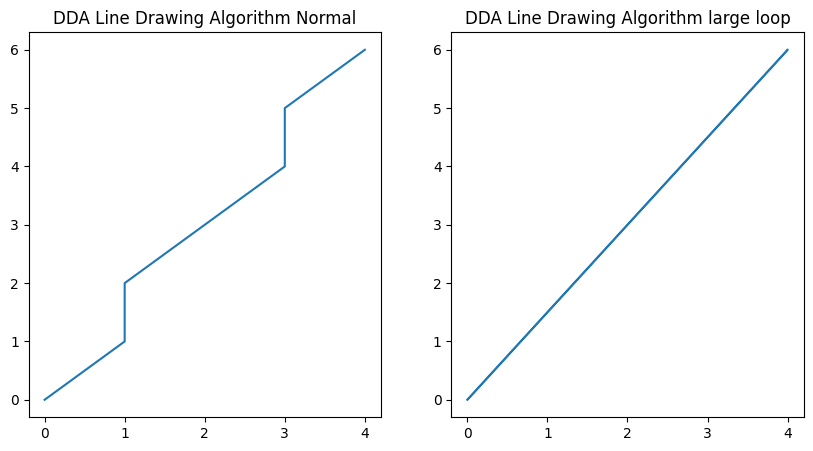

In [91]:
# initialize the figure
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5))

# plot the Normal distance between points
ax[0].plot(resulted_points[:, 0], resulted_points[:, 1])
ax[0].set(
    title = 'DDA Line Drawing Algorithm Normal',
)

# plot the large length lines
xlabels = np.arange(points[:,0].min(), points[:,0].max()+1)
ylabels = np.arange(points[:,1].min(), points[:,1].max()+1)
ax[1].plot(resulted_points_factor[:, 0], resulted_points_factor[:, 1])
ax[1].set(
    title = 'DDA Line Drawing Algorithm large loop',
    xticks = np.linspace(resulted_points_factor[:, 0].min(), resulted_points_factor[:, 0].max(), xlabels.shape[0]),
    yticks = np.linspace(resulted_points_factor[:, 1].min(), resulted_points_factor[:, 1].max(), ylabels.shape[0]),
    xticklabels = xlabels,
    yticklabels = ylabels
    
)
plt.show()

## 2. Bresenham's algorithm